### `Problem Statement: -` 

A US-Based housing company named Surprise Housing has decieded to enter the Australian Market. The company used Data Analytics to purchase houses at a price below their actual values and flip them at a higher price. 

The company wants to know: -
- Which variables are significant in predicting the price of a hoouse?
- How well those variables decribe the price of a house, Based on various market surveys, the consulting firm has collected a comprehensive dataset comprising different types of cars available in the American market?

### `Business Goal: -`
- Build regression model using regulatisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the optimal value of lambda for Ridge and Lasso Regression.
- This model will then be used by the management to understant how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the frim and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market.

### `1. Importing Required Libraries`

In [1]:
import pandas as pd
from pandas import DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

### `2. Reading and Understating the Dataset`

In [2]:
# Reading the dataset

df = pd.read_csv('train.csv')

In [3]:
# Top 5 observations of the dataset

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# last 5 observations of the dataset

df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [5]:
# Lets check the Shape of the dataset

df.shape

(1460, 81)

In [6]:
# Lets check the datatypes of each column in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Let see the basic idea of dataset.

df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

#### Out of the 18 features in the dataset, 5 features exhibit a significant proportion of missing values, with each of these features having more than 45% of their values missing.

In [8]:
# Lets check the count of duplicate rows in the dataset

duplicate_rows = len(df[df.duplicated()])
print('Count of duplicate rows in the dataset: ', round(duplicate_rows, 2))

Count of duplicate rows in the dataset:  0


In [9]:
# Lets check the percentage of Null/NaN values in all the columns

print('Percentage of Missing Values in each column are as follows:')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)
      [ round(df.isnull().sum()/len(df.index),2) > 0 ] )

Percentage of Missing Values in each column are as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


### `3. EDA - Exploratory Data Analysis`

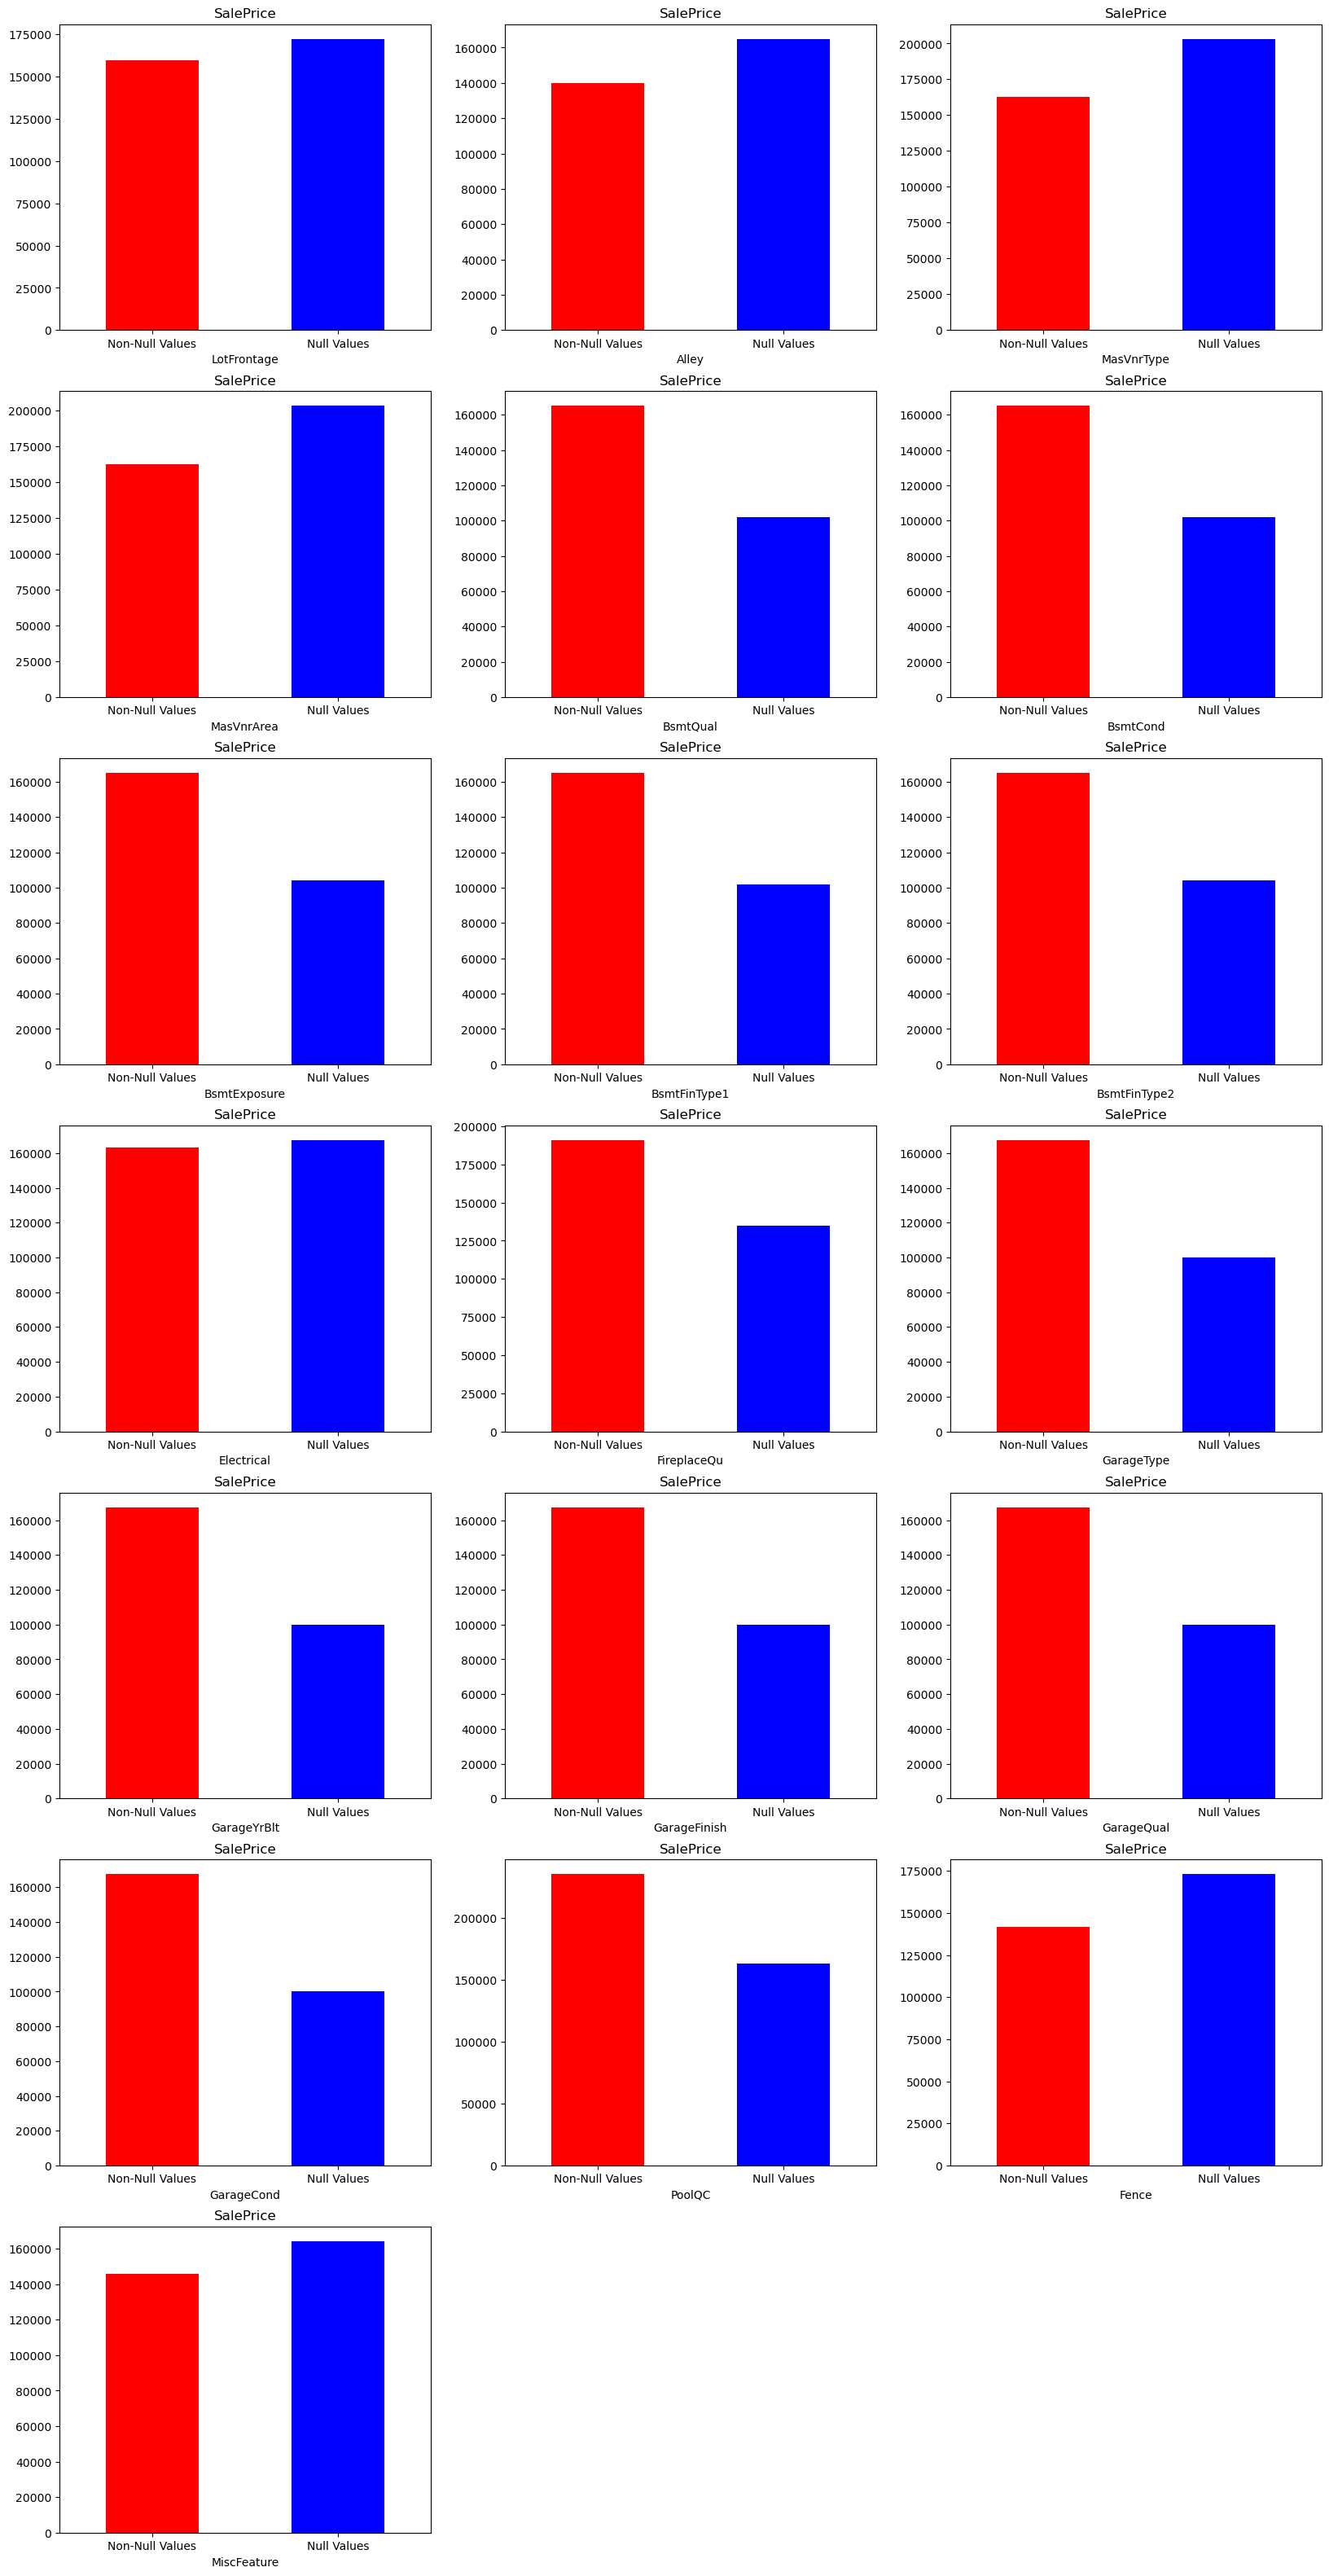

In [10]:
# Let's check if NaN values have any impact on the Sale Price or Not

nan_col = []
for i in df.columns:
    if df[i].isnull().sum() > 0:
        nan_col.append(i)
df_copy = df.copy()
fig,axs = plt.subplots(7, 3, figsize = (20, 40), squeeze = True)
for i, ax in zip(nan_col, axs.flatten()):
    df_copy[i] = np.where(df_copy[i].isnull(), 'Null Values', 'Non-Null Values')
    df_copy.groupby(i)['SalePrice'].median().plot.bar(color = list('rb'),rot=0,ax=ax, subplots=True)
axs[6, 1].set_axis_off()
axs[6, 2].set_axis_off()
plt.show()
    
    

#### The presence of NaN values significantly influences the Sale Price. Therefore, we will address the missing values as part of the feature engineering process.

In [11]:
# We'll examine the dataset to determine the count of numerical and categorical features.

num_col = []
cat_col = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat_col.append(i)
    else:
        num_col.append(i)
print('The dataset contains', len(cat_col) ,'categorical features.')
print('The dataset contains', len(num_col) ,'numerical features.')    

The dataset contains 43 categorical features.
The dataset contains 38 numerical features.


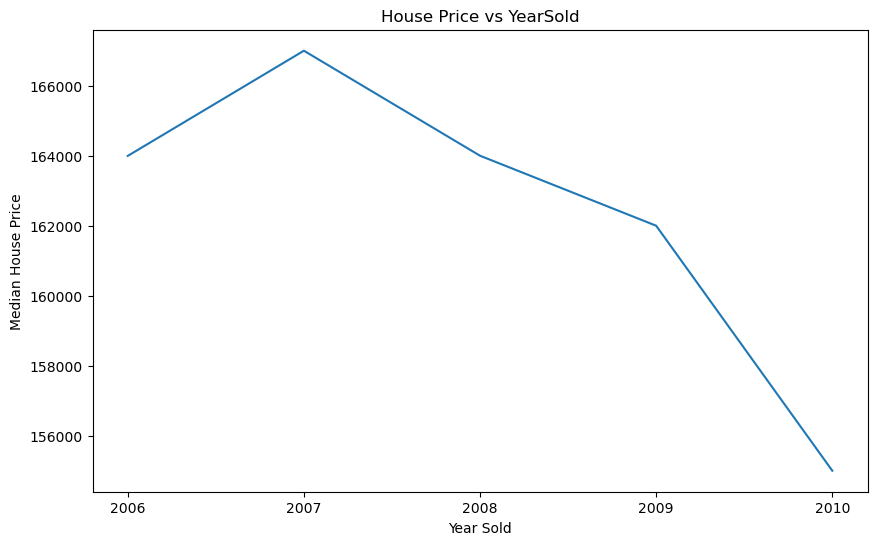

In [12]:
# Lets check if the median price changes with the year of sale.

plt.figure(figsize=(10, 6))
df['YrSold'] = df['YrSold'].astype('int')

median_prices = df.groupby('YrSold')['SalePrice'].median()
median_prices.plot()

plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.xticks(median_prices.index.astype(int))
plt.title("House Price vs YearSold")

plt.show()

#### The average price drops noticeably after 2007, especially following the 2008 housing bubble crash. This suggests that the year a house is sold significantly affects its sale price.

In [13]:
# Lets extract the Year Features from the dataset and then see how the price changes based on the age of the property.

yr_cols = []
for i in df.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        yr_cols.append(i)
print('List of features with Year are:')
print(yr_cols)

List of features with Year are:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


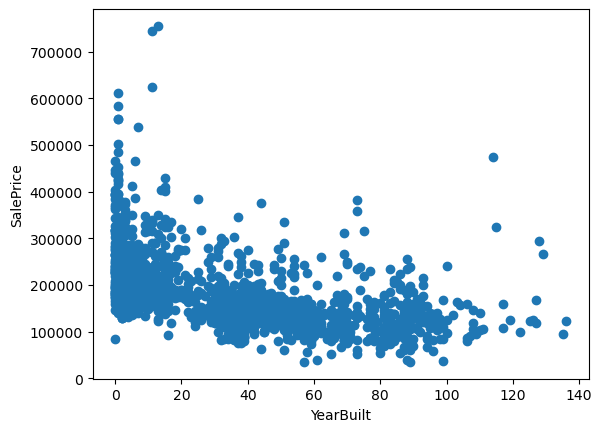

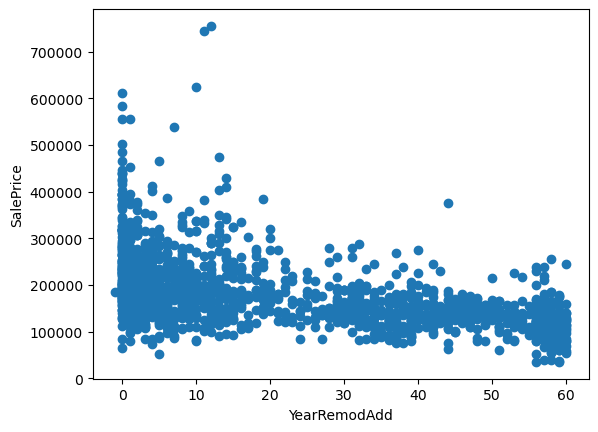

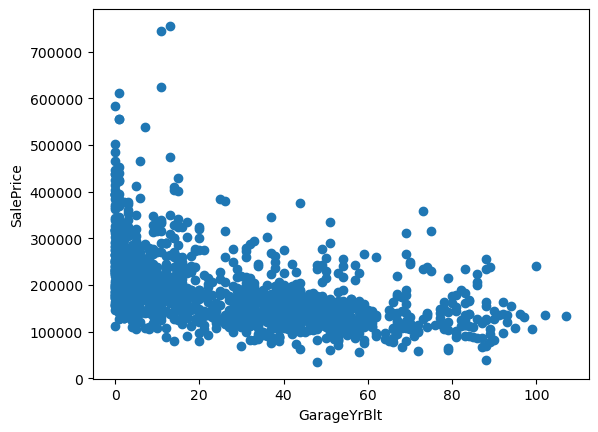

In [14]:
# Lets compare the Age of the Building, Renovated Building or Garage with the Sold Price.

for feature in yr_cols:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

#### It seems that newer properties are more expensive than older ones.

In [15]:
# We'll remove the ID columns from the dataset as they are not useful for prediction purposes.

df.drop('Id', axis=1, inplace=True)

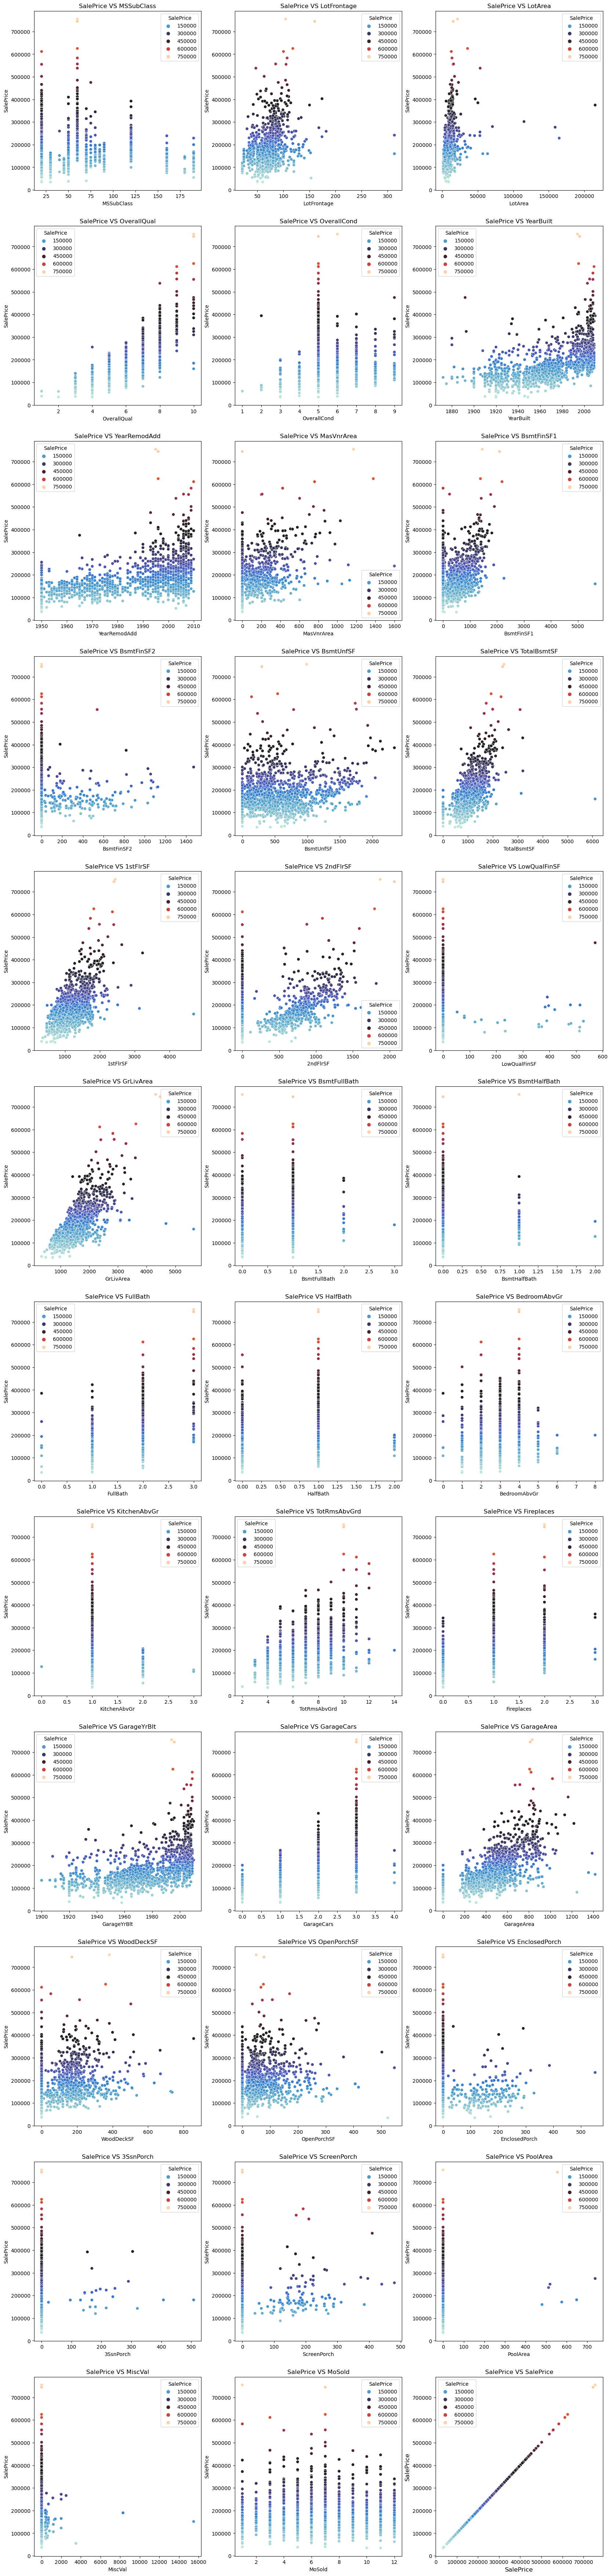

In [16]:
#Visualising numerical predictor variables with Target Variables
df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,90))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

####  Here are the observations from the above plot:

- New properties tend to be more expensive than older properties.
- The Gross Living Area (GRLivingArea) shows a direct correlation with the price of the property.
- The Total Basement Area, which is linearly related to the total living area, also exhibits a direct relationship with the property price.
- The month sold does not appear to have an effect on the price.

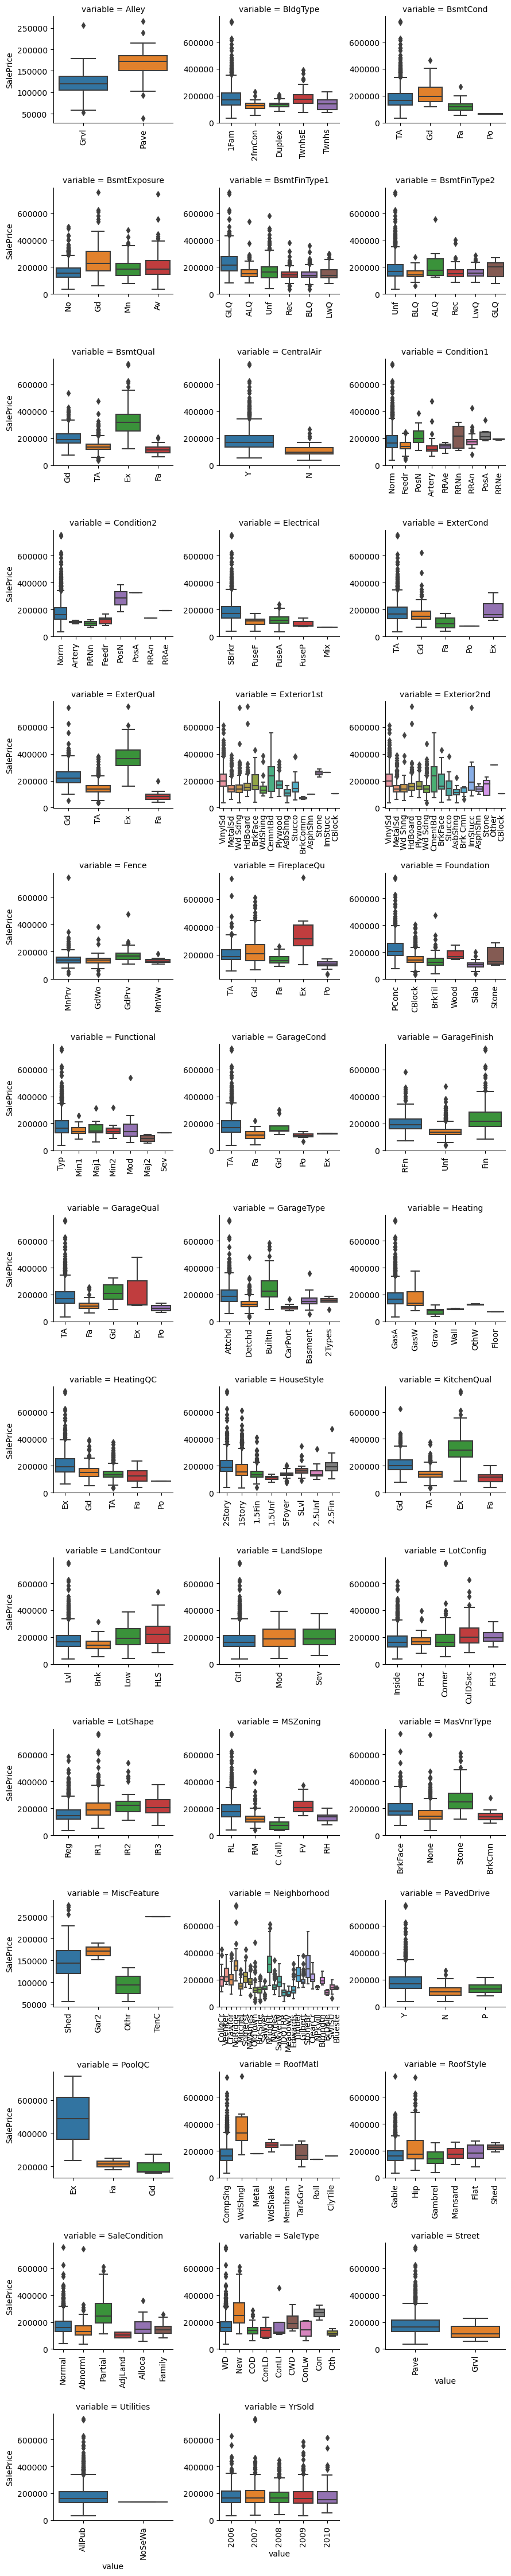

In [17]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

#### Here are the observations from the above box plots:

- Properties with paved alleys tend to command higher prices.
- Houses with good and excellent basement quality are sold at higher prices compared to others.
- Properties with good and excellent garage quality also fetch higher prices.
- Houses with good quality kitchens positively impact the price.

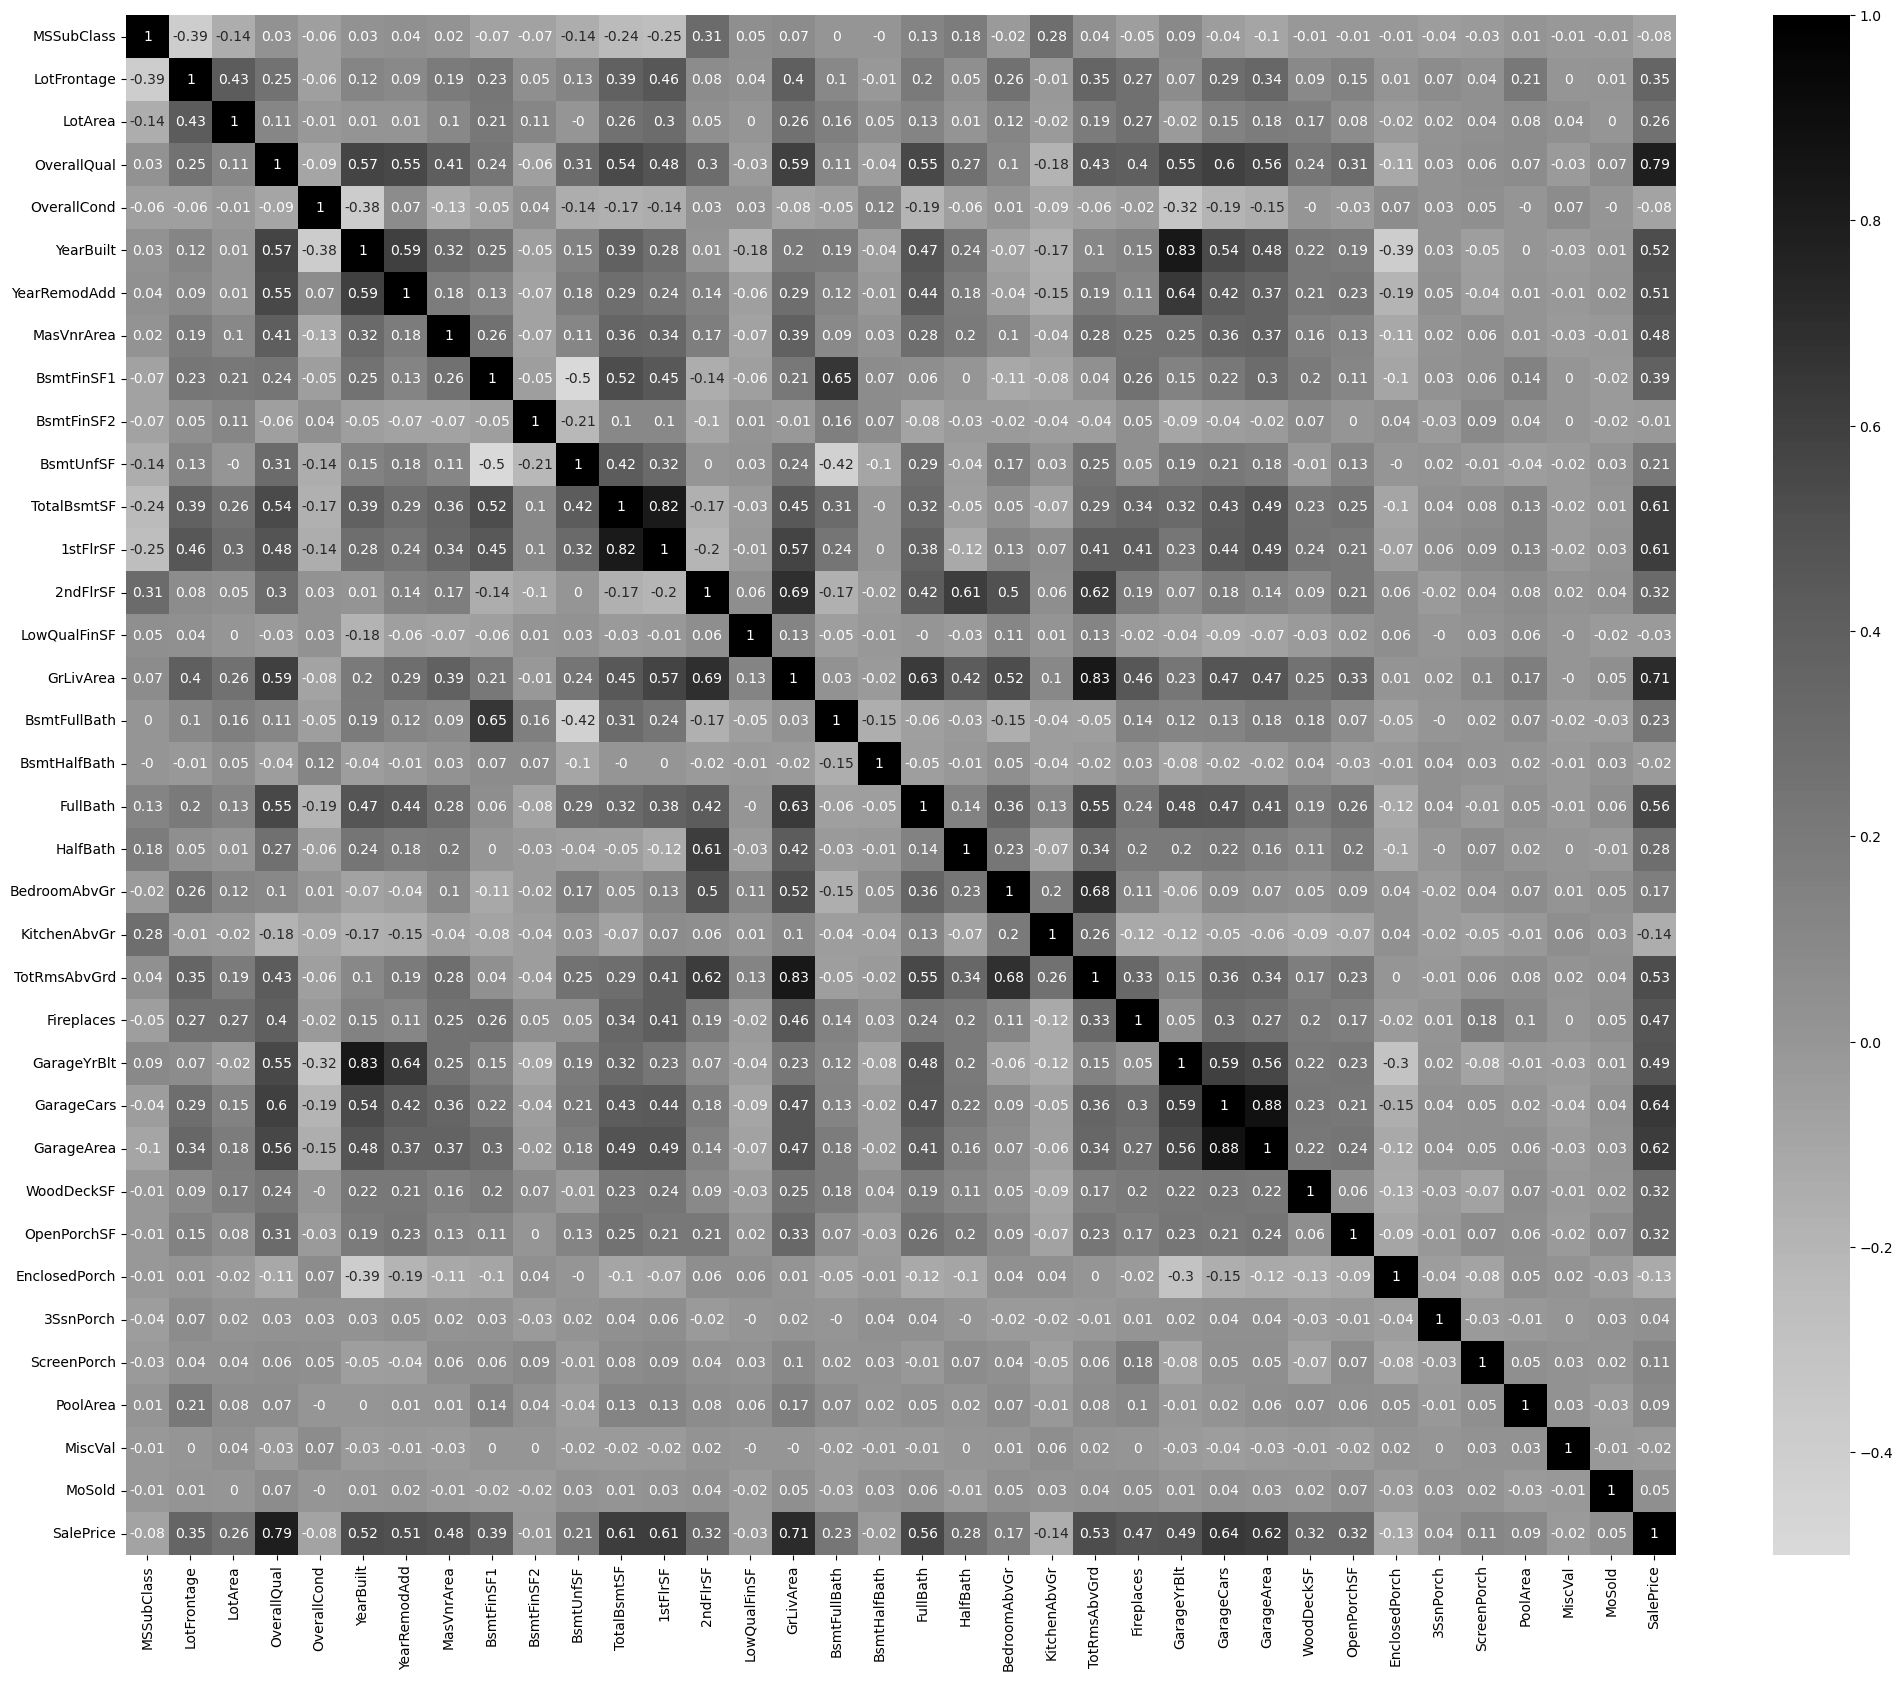

In [18]:
# Checking the corelation

plt.subplots(figsize = (25,20))

#Plotting heatmap of numerical features

sns.heatmap(round(df_num.corr(),2), cmap='Greys' , annot=True, center = 0)
plt.show()

#### We've observed that there are highly correlated features in the dataset. We'll proceed with the analysis and remove these highly correlated attributes in later steps.

### `4. Data Preparation`

In [19]:
# Lets create a new column to determine the age of property.

df['age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)

In [20]:
# We'll convert certain numerical columns to string columns as they represent categorical variables.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
# We'll convert the year columns to string format since they represent categorical features and should not be treated as numerical features.

df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave   NaN      Reg         Lvl   
1         20       RL         80.0     9600   Pave   NaN      Reg         Lvl   
2         60       RL         68.0    11250   Pave   NaN      IR1         Lvl   
3         70       RL         60.0     9550   Pave   NaN      IR1         Lvl   
4         60       RL         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0    AllPub    Inside  ...         NaN       0      2   2008       WD   
1    AllPub       FR2  ...         NaN       0      5   2007       WD   
2    AllPub    Inside  ...         NaN       0      9   2008       WD   
3    AllPub    Corner  ...         NaN       0      2   2006       WD   
4    AllPub       FR2  ...         NaN       0     12   2008       WD   

  SaleCondition  SalePrice  age  garage_age  remodel_age  
0        Normal     208500    5         5.0            5  
1        Normal     181500   31        31.0           31  
2        Normal     223500    7         7.0            6  
3       Abnorml     140000   91         8.0           36  
4        Normal     250000    8         8.0            8  

[5 rows x 82 columns]

### `5. Handling Missing Values`

Rather than dropping rows or columns with missing values, we'll impute the NaN values with placeholders such as "None" or "Default". This is because when a certain feature is missing in a property, it is assumed to be left blank during data collection.

In [22]:
# Lets check the percentage of Null/NaN values in all the columns again

print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)
      [ round(df.isnull().sum()/len(df.index),2) > 0 ] )

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
garage_age       5.55
GarageFinish     5.55
GarageType       5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [23]:
# From the Data Description

# NA = No Pool for PoolQC
df['PoolQC'] = df['PoolQC'].fillna('None')

# NA = No Misc Feature for MiscFeature
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# NA = No Alley
df['Alley'] = df['Alley'].fillna('None')

# NA = No Fireplace for FireplaceQu
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

# NA = No Fence
df['Fence'] = df['Fence'].fillna('None')

# NA = No Fireplace
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

# NA = No Garage
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['garage_age'] = df['GarageQual'].fillna(0)  

# NA = No Basement
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')

# NA = No Masonery Area
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [24]:
# Lets check the list of columns that contain null values in the dataset again.

print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)
      [ round(df.isnull().sum()/len(df.index),2) > 0 ] )

LotFrontage    17.74
dtype: float64


In [25]:
#LotFrontage : Replacing Null value with the median of the neighbourhood

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [26]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)
[ round(df.isnull().sum()/len(df.index),5) > 0 ]

[MSSubClass       False
 MSZoning         False
 LotFrontage      False
 LotArea          False
 Street           False
                  ...  
 SaleCondition    False
 SalePrice        False
 age              False
 garage_age       False
 remodel_age      False
 Length: 82, dtype: bool]

In [27]:
# Filling the Electrical 0.06% rows with the mode

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [28]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)

MSSubClass      0.0
GarageQual      0.0
GarageCars      0.0
GarageFinish    0.0
GarageType      0.0
               ... 
ExterQual       0.0
MasVnrArea      0.0
MasVnrType      0.0
Exterior2nd     0.0
remodel_age     0.0
Length: 82, dtype: float64

### `6. Feature Engineering`

In [29]:
print(df['Utilities'].value_counts())
print(df['Street'].value_counts())
print(df['PoolQC'].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64


#### Some columns have over 99% identical values, indicating that they do not contribute significantly to predicting the target variable.

In [30]:
# Trying to remove redundant features

def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [31]:
redundant_features = redundant_feature(df)
redundant_features

['Street', 'Utilities', 'PoolArea', 'PoolQC']

#### We'll drop these features since they consist of more than 99% of a single category and are not useful for prediction.

In [32]:
df.drop(redundant_features,axis=1,inplace=True)

In [33]:
# Lets check the shape of dataset after removing redundant feature.

df.shape

(1460, 78)

In [34]:
# Lets remove the outliers from the dataset to enhance the robustness of the model.
# Based on Exploratory Data Analysis, we've identified outliers in Living Area, Garage Area, Basement Area, and Lot Area. 
# We'll remove outliers from these features. 
# Other outliers will be addressed during the power transformation process.

def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df = drop_outliers(df)
df.shape

(1455, 78)

#### We have successfully removed 6 outliers from the dataset.

In [35]:
# Lets create some new features based on the existing features

# Vintage houses that have been remodeled play an important role in predicting high prices.
df['YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']

# Creating a new column for the total area in square feet, which includes the overall area for all floors and the basement,
# as it plays an important role.
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])

# Creating derived column for total number of bathrooms column.
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

# Creating derived column for total porch area.
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'])

In [36]:
# Lets create dummy variables for Categorical Columns.

num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)

In [37]:
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleCondition_Alloca  \
0       196.0         706           0        150  ...                     0   
1         0.0         978           0        284  ...                     0   
2       162.0         486           0        434  ...                     0   
3         0.0         216           0        540  ...                     0   
4       350.0         655           0        490  ...                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                     0                     1                      0   
1                     0                     1                      0   
2                     0                     1                      0   
3                     0                     0                      0   
4                     0                     1                      0   

   garage_age_Ex  garage_age_Fa  garage_age_Gd  garage_age_None  \
0              0              0              0                0   
1              0              0              0                0   
2              0              0              0                0   
3              0              0              0                0   
4              0              0              0                0   

   garage_age_Po  garage_age_TA  
0              0              1  
1              0              1  
2              0              1  
3              0              1  
4              0              1  

[5 rows x 333 columns]

In [38]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [39]:
# Checking co-related features

corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

OverallQual           GarageCars               0.602025
                      YrBltAndRemod            0.628465
                      ExterQual_TA            -0.647338
YearBuilt             age                     -0.999036
                      YrBltAndRemod            0.931280
                                                 ...   
SaleType_New          SaleCondition_Partial    0.986718
SaleType_WD           SaleCondition_Normal     0.632805
                      SaleCondition_Partial   -0.768294
SaleCondition_Normal  SaleCondition_Partial   -0.652835
garage_age_None       garage_age_TA           -0.718832
Length: 165, dtype: float64


In [40]:
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','YrBltAndRemod','Total_Bathrooms','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc','garage_age_None'],
         axis=1,inplace=True)

In [41]:
# Lets check the shape after dropping all co-related columns.

X.shape

(1455, 234)

In [42]:
# Splitting the dataset into Train and Test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

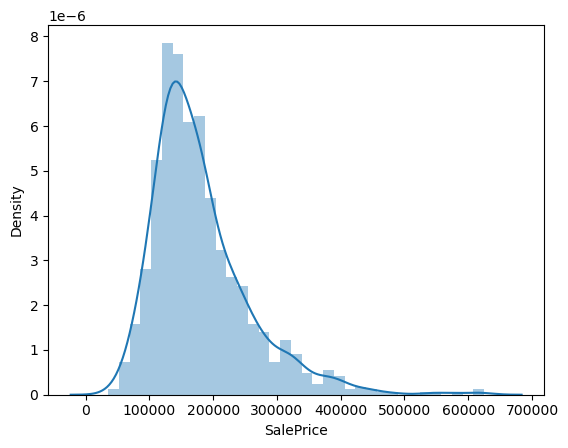

In [43]:
# Distribution of Target Variable

sns.distplot(y_train)
plt.show()

#### The data is right-skewed, so we'll transform it to make it more Gaussian.

In [44]:
# Lets transform the target feature to make the data more Gaussian.

pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

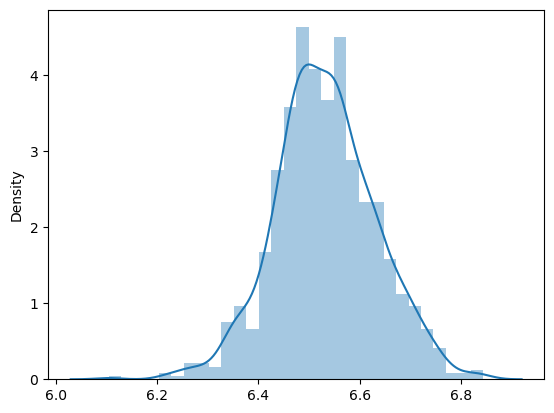

In [45]:
sns.distplot(y_train)
plt.show()

#### The transformation of the target variable is complete.

In [46]:
# Lets scale the data using a MinMax Scaler.

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [47]:
X_train.head()

LotFrontage   LotArea  OverallCond  LowQualFinSF  BsmtFullBath  \
0     0.068493  0.052116     0.428571           0.0           0.5   
1     0.136986  0.128504     0.428571           0.0           0.5   
2     0.150685  0.118124     0.428571           0.0           0.0   
3     0.301370  0.106880     0.428571           0.0           0.0   
4     0.236301  0.143217     0.428571           0.0           0.5   

   BsmtHalfBath  TotRmsAbvGrd  GarageArea  OpenPorchSF  EnclosedPorch  ...  \
0           0.0      0.333333    0.418705     0.000000       0.307971  ...   
1           0.0      0.555556    0.618705     0.083665       0.000000  ...   
2           0.0      0.555556    0.312230     0.095618       0.000000  ...   
3           0.0      0.222222    0.323741     0.000000       0.000000  ...   
4           0.0      0.444444    0.505036     0.089641       0.000000  ...   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                    0.0                    0.0                   0.0   
1                    0.0                    0.0                   0.0   
2                    0.0                    0.0                   0.0   
3                    0.0                    0.0                   0.0   
4                    0.0                    0.0                   0.0   

   SaleCondition_Family  SaleCondition_Partial  garage_age_Ex  garage_age_Fa  \
0                   0.0                    0.0            0.0            0.0   
1                   0.0                    0.0            0.0            0.0   
2                   0.0                    0.0            0.0            0.0   
3                   0.0                    0.0            0.0            0.0   
4                   0.0                    0.0            0.0            0.0   

   garage_age_Gd  garage_age_Po  garage_age_TA  
0            0.0            0.0            1.0  
1            0.0            0.0            1.0  
2            0.0            0.0            1.0  
3            0.0            0.0            1.0  
4            0.0            0.0            1.0  

[5 rows x 234 columns]

### `7. Ridge Regression`

Fitting 11 folds for each of 28 candidates, totalling 308 fits


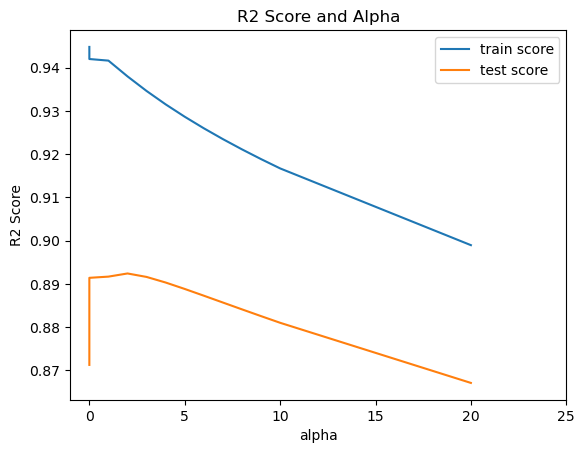

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8614332089117439
The MSE of the model on the test dataset for optimum alpha is 0.0014830541745090387


In [48]:
# List of Alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [49]:
# Lets check the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

Features    VIF
233         garage_age_TA    inf
175        FireplaceQu_Ex    inf
97    Exterior1st_AsphShn    inf
96    Exterior1st_AsbShng    inf
168       Functional_Maj1    inf
..                    ...    ...
56   Neighborhood_SawyerW  18.31
48   Neighborhood_Mitchel  15.59
43   Neighborhood_Crawfor  14.42
46    Neighborhood_IDOTRR  13.00
51   Neighborhood_NoRidge  12.76

[90 rows x 2 columns]

In [50]:
# Let drop columns with high VIF

X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Fitting 11 folds for each of 28 candidates, totalling 308 fits


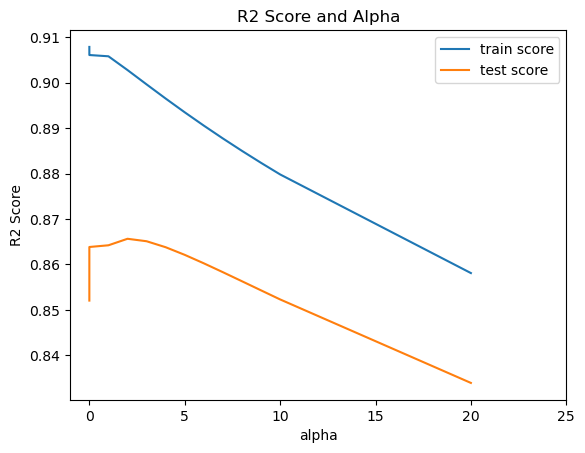

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8268114695684508
The MSE of the model on the test dataset for optimum alpha is 0.0018536041068455062


In [51]:
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# Cross Validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)

ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)

print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))

print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [52]:
# Displaying the coefficients of the model.

ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
Total_sqr_footage               0.176041
GarageArea                      0.105032
TotRmsAbvGrd                    0.068524
LotArea                         0.051735
OverallCond                     0.048864
CentralAir_Y                    0.032595
LotFrontage                     0.031254
Neighborhood_StoneBr            0.029776
HouseStyle_2.5Unf               0.029395
Alley_Pave                      0.026168
RoofMatl_WdShngl                0.024940
Neighborhood_Veenker            0.024193
MSSubClass_70                   0.022818
Condition1_PosN                 0.021967
Condition2_PosA                 0.021145
PavedDrive_P                    0.020700
SaleType_Con                    0.020446
ExterCond_Ex                    0.019837
BsmtQual_Ex                     0.019191
KitchenQual_Ex                  0.018763

#### The top 20 features impacting the price of the property are listed above.

### `8. Lasso`

#### For demonstration purposes, we'll also try a Lasso model to evaluate its overall performance.

In [53]:
# Lets create a model with an arbitrary alpha value to understand the value ranges and evaluate its performance.

lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.8245530696763761
The MSE of the model on the test dataset for optimum alpha is 0.001877775334030228


#### The Lasso model utilizes a total of 75 features.

Fitting 11 folds for each of 11 candidates, totalling 121 fits


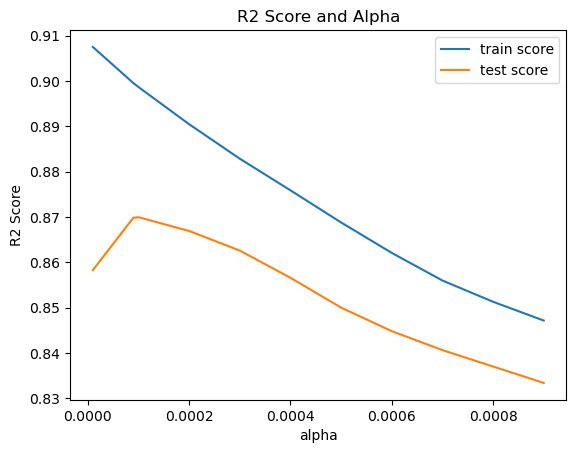

The optimum alpha is 0.0001
The R2 Score of the model on the test dataset for optimum alpha is 0.8245530696763761
The MSE of the model on the test dataset for optimum alpha is 0.001877775334030228


In [54]:
# Building a Lasso Model with GridSearch CV to find the optimum alpha

params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [55]:
# Displaying the co-efficients of the model

lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

Lasso Co-Efficient
Total_sqr_footage               0.209067
GarageArea                      0.114571
TotRmsAbvGrd                    0.064219
LotArea                         0.056531
OverallCond                     0.048484
CentralAir_Y                    0.033568
Neighborhood_StoneBr            0.024157
Alley_Pave                      0.022826
HouseStyle_2.5Unf               0.020672
MSSubClass_70                   0.018613
BsmtQual_Ex                     0.018150
KitchenQual_Ex                  0.015777
Neighborhood_Veenker            0.015695
LandContour_HLS                 0.015332
Condition1_PosN                 0.015328
Condition1_Norm                 0.014940
MasVnrType_Stone                0.014891
PavedDrive_P                    0.013511
BsmtCond_TA                     0.011741
PavedDrive_Y                    0.011409

#### The top 20 features of the final Lasso model is stated above.

#### The Final Ridge Regression Model is as follows:-

In [56]:
ridge_final2

Ridge(alpha=2, random_state=100)

#### The Final Lasso Regression Model is as follows:-

In [57]:
lasso_final2

Lasso(alpha=0.0001, random_state=100)

#### We are able to achieve an R2 score of 0.82 approx on both Ridge and Lasso Models. The follwing factors influence the house price the most as demosntrated by both the models:-

- Total Area in Square Foot
- Total Garage Area
- Total Rooms
- Overall Condition
- Lot Area
- Centrally Air Conditioned
- Total Porch Area (Open + Enclosed)
- Kitchen Quality
- Basement Quality

### `9. Subjective Question - Validation`

In [58]:
# We'll build a Ridge model by doubling the value of alpha from 2 to 4.

ridge_double = Ridge(alpha=4,random_state=100)
ridge_double.fit(X_train_rfe2,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.824746826086596
The MSE of the model on the test dataset for doubled alpha is 0.0018757015957935421
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
Total_sqr_footage                             0.155621
GarageArea                                    0.095279
TotRmsAbvGrd                                  0.069923
LotArea                                       0.044952
OverallCond                                   0.044792
CentralAir_Y                                  0.032255
Neighborhood_StoneBr                          0.027367
LotFrontage                                   0.027234
HouseStyle_2.5Unf                             0.025527
Alley_Pave                                    0.023545
MSSubClass_70                                 0.021947
Neighborhood_Veenker                          0.021862
BsmtQual_Ex                                   0.021273
RoofMatl_WdShngl                              0.020224
Condition1_PosN                               0.019441
KitchenQual_Ex                                0.019310
MasVnrType_Stone                              0.018827
PavedDrive_P                                  0.018461
PavedDrive_Y                                  0.015740
Condition1_Norm                               0.015182

In [59]:
# We'll build a Lasso model by doubling the value of alpha from 0.001 to 0.002

lasso_double = Lasso(alpha=0.0002,random_state=100)
lasso_double.fit(X_train_rfe2,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8219118652890549
The MSE of the model on the test dataset for doubled alpha is 0.0019060436453736966
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
Total_sqr_footage                              0.211765
GarageArea                                     0.106625
TotRmsAbvGrd                                   0.066123
OverallCond                                    0.044459
LotArea                                        0.038191
CentralAir_Y                                   0.033482
BsmtQual_Ex                                    0.019367
Alley_Pave                                     0.018900
Neighborhood_StoneBr                           0.018490
KitchenQual_Ex                                 0.015456
MSSubClass_70                                  0.014084
MasVnrType_Stone                               0.013712
Condition1_Norm                                0.012867
LandContour_HLS                                0.012794
BsmtCond_TA                                    0.012041
SaleCondition_Partial                          0.010618
LotConfig_CulDSac                              0.009422
PavedDrive_Y                                   0.007679
ExterQual_Ex                                   0.007250
MasVnrType_BrkFace                             0.007204

In [60]:
# We'll remove the 5 most important predictor variables from the incoming dataset.

X_test_rfe3 = X_test_rfe2.drop(['Total_sqr_footage','GarageArea','TotRmsAbvGrd','OverallCond','LotArea'],axis=1)
X_train_rfe3 = X_train_rfe2.drop(['Total_sqr_footage','GarageArea','TotRmsAbvGrd','OverallCond','LotArea'],axis=1)

# We'll build a Lasso model using the new dataset.

lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.7187082863401482
The MSE of the model on the test dataset is 0.003010612044355848
The most important predictor variables are as follows:


Lasso Co-Efficient
LotFrontage                     0.151172
HouseStyle_2.5Unf               0.084901
HouseStyle_2.5Fin               0.065238
Neighborhood_Veenker            0.050660
Neighborhood_StoneBr            0.046351